### Project Objective
The objective of this project is to demonstrate self-supervised learning using image inpainting on CIFAR-10 data *and* goal is to learn to predict the missing parts of images.



2/2 [==============================] - 0s 40ms/step


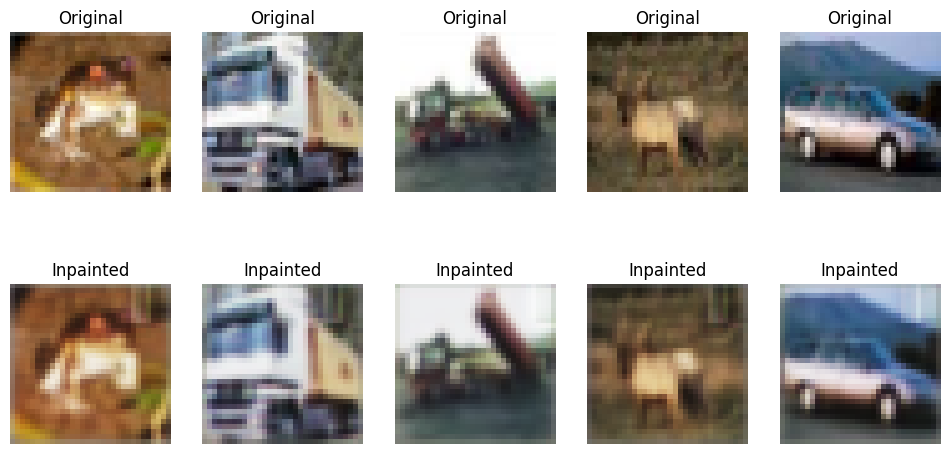

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def self_supervised_image_inpainting():
    (x_train, _), (_, _) = cifar10.load_data()
    # Use a chunk of CIFAR-10 data for demonstration
    num_samples = 50
    x_train = x_train[:num_samples]
    # Normalize and preprocess data
    x_train = x_train / 255.0
    # Define a mask for inpainting (remove parts of images)
    mask_height, mask_width = 8, 8
    mask = np.ones((mask_height, mask_width, 3))
    mask[:, mask_width // 2:] = 0  # Mask the right half of the image
    # Apply mask to images
    masked_images = x_train.copy()
    masked_images[:, :mask_height, -mask_width:] = mask
    # Define an image inpainting model (self-supervised task)
    input_image = Input(shape=(32, 32, 3))
    masked_image = Input(shape=(32, 32, 3))
    concatenated = concatenate([input_image, masked_image], axis=-1)
    # Encoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(concatenated)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    # Create the inpainting model
    inpainting_model = Model([input_image, masked_image], encoded)
    inpainting_model.compile(optimizer='adam', loss='mean_squared_error')
    # Train the model for self-supervised learning (image inpainting)
    inpainting_model.fit([x_train, masked_images], x_train, epochs=50, batch_size=32, verbose=0)
    # Inpaint images (generate missing parts)
    inpainted_images = inpainting_model.predict([x_train, masked_images])
    plt.figure(figsize=(12, 6))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_train[i])
        plt.title("Original")
        plt.axis('off')
        plt.subplot(2, 5, i + 6)
        plt.imshow(inpainted_images[i])
        plt.title("Inpainted")
        plt.axis('off')
    plt.show()
    return inpainted_images
if __name__ == "__main__":
    inpainted_images = self_supervised_image_inpainting()


### Result Interpretation:
1. In the visualization, the left side shows the original images, while the right side shows the inpainted images generated by the model.
2.The inpainted images demonstrate the model's ability to predict the missing parts of the images, indicating successful self-supervised learning through the pretext task of image inpainting.

**User Defined Image Inpainting using SSL**

1/1 [==============================] - 0s 331ms/step


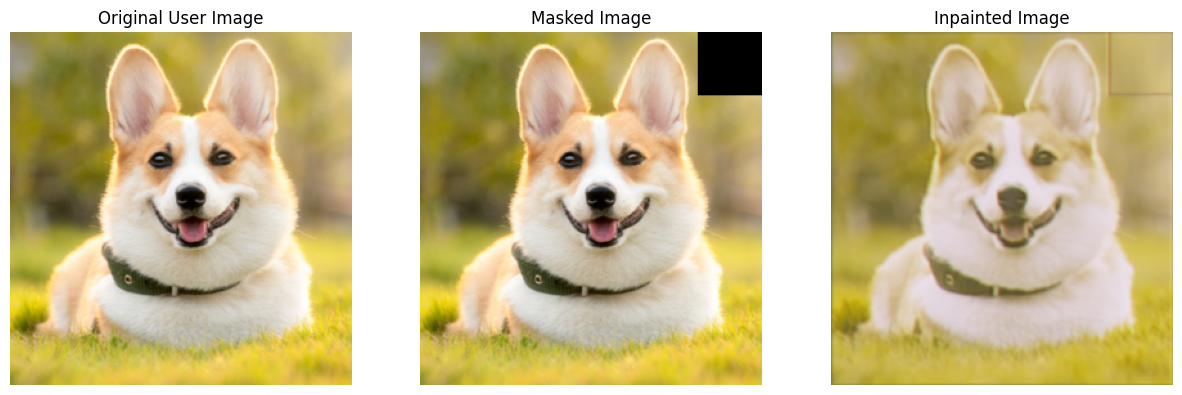

In [ ]:

def inpaint_image(user_image_path, mask_height=50, mask_width=50, epochs=50):
    # Load user-uploaded image
    user_image = img_to_array(load_img(user_image_path)) / 255.0

    # Create mask for inpainting
    mask = np.zeros((user_image.shape[0], user_image.shape[1], 3))
    mask[:mask_height, -mask_width:] = 1.0  # Define the region to inpaint

    # Apply mask to user image
    masked_image = user_image * (1 - mask)

    # Define inpainting model
    input_image = Input(shape=user_image.shape)
    masked_image_input = Input(shape=user_image.shape)
    concatenated = concatenate([input_image, masked_image_input], axis=-1)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(concatenated)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    inpainting_model = Model([input_image, masked_image_input], encoded)
    inpainting_model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model for image inpainting
    inpainting_model.fit([user_image[np.newaxis], masked_image[np.newaxis]], user_image[np.newaxis], epochs=epochs, batch_size=1, verbose=0)

    # Inpaint the user image
    inpainted_image = inpainting_model.predict([user_image[np.newaxis], masked_image[np.newaxis]])[0]

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(user_image)
    plt.title("Original User Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(masked_image)
    plt.title("Masked Image")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(inpainted_image)
    plt.title("Inpainted Image")
    plt.axis('off')

    plt.show()

    return inpainted_image

# Example usage:
if __name__ == "__main__":
    user_image_path = r'./drive/My Drive/pets/dog.png'
    inpainted_image = inpaint_image(user_image_path)
